# Clustering

This notebook introduces a fundamental task in unsupervised machine learning: *clustering* a dataset. This is a huge topic in its own right; we will use it as a motivating idea for studying the *topology* of data.

## Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## $K$-Means Clustering

The idea of $K$-Means clustering is as follows. 

We begin with a dataset $X = \{x^1,\ldots,x^M\}$ of $M$ points $x^j = (x^j_1,\ldots,x^j_N)$ in $\mathbb{R}^N$. The goal is to partition this dataset into $K$ *clusters*, where $K$ is a positive integer of our choosing.

To do so, we minimize a function on the space of *$K$-partitions* of $X$; that is, collections $\mathcal{S} = \{S_1,\ldots,S_K\}$, where each $S_j$ is a nonempty subset of $X$, $S_i \cap S_j = \emptyset$ for $i \neq j$ and $\cup_i S_i = X$. The function is defined by
$$
f(\mathcal{S}) = \sum_{j=1}^K \sum_{x \in S_j} \| x - \mu_j \|^2,
$$
where $\mu_j = \frac{1}{|S_j|} \sum_{x \in S_j} x$ is the *Euclidean mean* of the points in $S_j$. 

### Toy Dataset

Let's create a toy dataset to try this out on. We'll use a built-in function from the `sklearn` package to generate some 'blobs'.

In [6]:
from sklearn.datasets import make_blobs

K = 2 # classes
N = 100 # in each class
dimension = 2 # Ambient dimension. Let's do this in the plane

# Create dataset X, together with 'ground truth' labels y indicating true clusters
X, y = make_blobs(n_samples=N*K, centers=K, n_features=dimension, random_state=3)

Let's take a look at the data we generated.

In [7]:
print('Dataset:')
print(X)
print('Labels:')
print(y)

Dataset:
[[ 8.88195994e-01  4.41112448e+00]
 [ 3.67547163e-01  3.42549161e+00]
 [-4.21069087e+00 -1.25739072e+00]
 [ 5.85067996e-01  3.62268619e+00]
 [-2.16225458e+00  5.42814377e-01]
 [-3.83108938e+00  1.84312571e+00]
 [ 2.24942910e+00  4.31194285e+00]
 [ 1.89024377e+00  2.86941982e+00]
 [ 6.94373358e-01  4.31408682e+00]
 [ 9.20720453e-01  3.63576867e+00]
 [-4.70700019e-01  5.57158341e+00]
 [ 1.65912133e+00  4.41204316e+00]
 [ 1.81718201e-01  5.50794891e+00]
 [-5.46813455e+00 -9.27169722e-01]
 [ 4.70598104e-01  2.61647914e+00]
 [ 6.59687292e-01  2.41981542e+00]
 [-3.11468967e+00  8.57972760e-01]
 [-6.12697748e+00 -9.43170847e-01]
 [-3.76352420e+00 -6.75854231e-01]
 [-1.01443550e+00  3.20218134e+00]
 [ 2.02914149e+00  5.01575429e+00]
 [-4.09694116e+00  1.31433159e+00]
 [-4.10281303e+00 -7.48211363e-01]
 [-4.09087071e+00  1.00198435e+00]
 [-2.28165277e-01  3.53653954e+00]
 [ 1.85180195e+00  4.65507536e+00]
 [-4.40122731e-03  4.43354988e+00]
 [ 2.12414555e+00  5.28234711e+00]
 [ 8.185433

So `X` is an array. Each row is a point in $\mathbb{R}^2$. The labels `y` are a list of 0's and 1's.

We can plot the data with the following syntax.

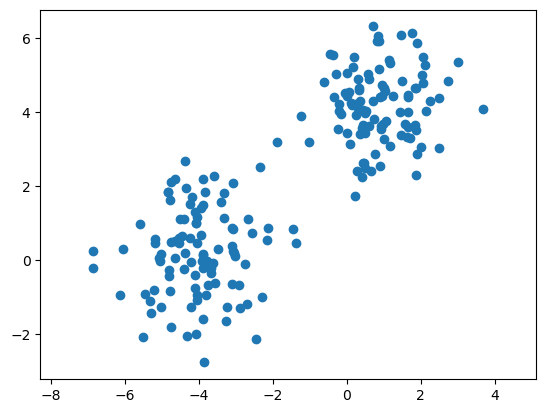

In [8]:
plt.scatter(X[:,0],X[:,1])
plt.axis('equal')

plt.show()

We can also plot the data with 'ground truth' colors to see what a perfect clustering algorithm should do.

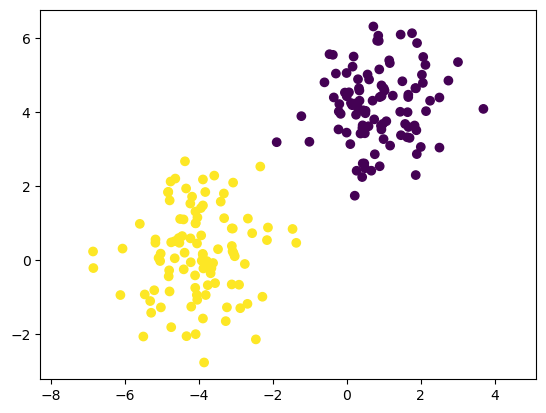

In [9]:
plt.scatter(X[:,0], X[:,1], c = y)
plt.axis('equal')

plt.show()

### Solving $K$-Means

Now let's try find the minizing partition $\mathcal{S}$ of our dataset. It is actually computationally intractible to find the true minimum of $f(\mathcal{S})$ in practice; nonetheless, the solution can be approximated by, say, gradient descent. $K$-means is ubiquitous in data science and there are packages for efficiently finding locally optimal solutions. Let's use the implementation from the package `sklearn`.

**Extra Time/Check it out yourself later if interested:** At the end of this notebook, there is an implementation of approximating $K$-means 'from scratch'---i.e., without calling a package to solve it for us. If you're interested in the 'nuts and bolts' of this sort of algorithm, please check it out!

In [11]:
# Import the KMeans algorithm from sklearn
from sklearn.cluster import KMeans

K = 2 # Need to choose the number of clusters for KMeans.

# The following is common sklearn syntax. We 'fit' the KMeans model to our datset X. The variable kmeans that this
# returns then stores all of the information about KMeans for X that we are interested in.
kmeans = KMeans(n_clusters=K).fit(X)

We can extract labels determined by this algorithm.

In [12]:
kmeans.labels_

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1], dtype=int32)

The above describes the 'optimal' partition $\mathcal{S}$. That is, $\mathcal{S} = \{S_1,S_2\}$. If a point gets label $0$ in the list above then it belongs to (say) $S_1$, whereas if it gets label $1$ then it belongs to $S_2$.

We can also extract the *cluster centers*.

In [13]:
kmeans.cluster_centers_

array([[ 0.86365548,  4.17204079],
       [-4.03900883,  0.19275413]])

These are the optimal $\mu_1$ (first column) and $\mu_2$ (second column) from the definition of $K$-Means. 

Let's plot everything together: We'll plot our datset $X$, color its points by the labels above and we'll also plot the cluster centers on the same scatter plot.

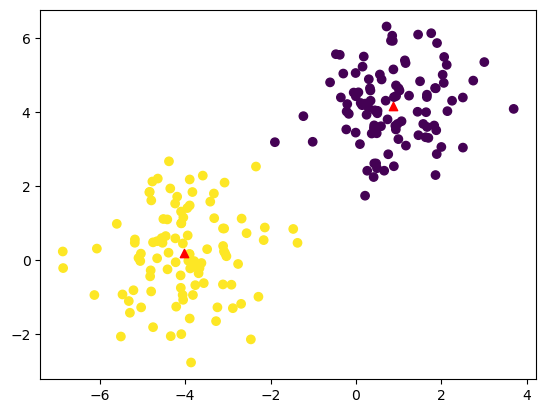

In [14]:
plt.scatter(X[:,0],X[:,1],c = kmeans.labels_)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],marker = '^', c = 'r')
plt.show()

Looks good!

### Changing the Number of Clusters

$K$-Means requires us to choose a number of clusters. If we choose the wrong number of clusters, we get bad results! This is an issue if we are dealing with high-dimensional data with an unknown 'ground truth'---in practice, this would frequently be the case.

**Remark:** Of course, there are ways to deal with this; e.g., 'elbow analysis', exploratory dimension reduction, etc. We won't go into these in detail.

Let's change the $K$ parameter in what we did above and see what happens.

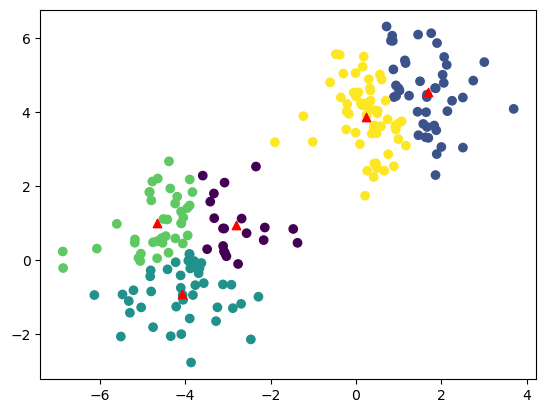

In [16]:
K = 5 # The only thing that nees to be changed

kmeans = KMeans(n_clusters=K).fit(X)
plt.scatter(X[:,0],X[:,1],c = kmeans.labels_)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],marker = '^', c = 'r')
plt.show()

Whichever $K$ we choose, we get some 'optimal' partition. If we don't choose $K$ correctly, this partition is not very meaningful. 

### Optional HW

Play around with the above code. Change parameters around to see what everything does. Going back to the beginning, you can change the dataset to have a different number of clusters or a different structure.

In my experience, one of the best ways to learn to code is to play with existing code in this way!

### Another Example --- 'Non Blobby' Data

Another issue with $K$-Means is that it's easy to construct datasets which the algorithm will not be able to handle.

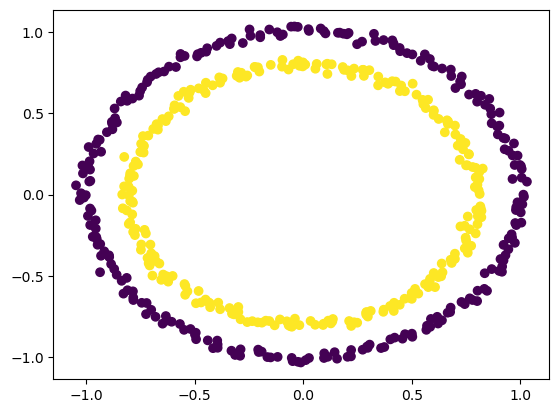

In [17]:
# Import another function for generating data
from sklearn.datasets import make_circles

X1, y1 = make_circles(n_samples=500, noise = 0.02, random_state = 2) 
# Some parameter choices here; feel free to tweak them

plt.scatter(X1[:,0],X1[:,1],c=y1)
plt.show()

Since $K$-Means operates by taking Euclidean means, we anticipate that it cannot find the 'true' clustering structure, no matter how we choose $K$. Let's test this.

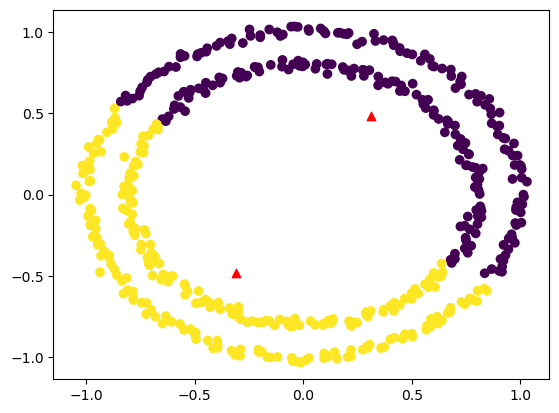

In [18]:
K = 2

kmeans = KMeans(n_clusters=K).fit(X1) # Changed the dataset to X1 here and in the next line
plt.scatter(X1[:,0],X1[:,1],c = kmeans.labels_)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],marker = '^', c = 'r')
plt.show()

## Summary: Issues with $K$-Means

We have observed the following issues:
- $K$-Means is not actually computable. It can be approximated and this seems to work, but causes issues when trying to deal with theory.
- User must choose $K$. This might not always be obvious and *perhaps* there is not even a single true value for $K$. 
- By its nature, $K$-Means doesn't handle data which isn't 'blobby' very well.

There are workarounds for all of these issues ($K$-Means is very popular!), but we will introduce an alternative approach to clustering which naturally circumvents them.

## Hierarchical Clustering

What if we didn't fix the $K$ parameter at the outset of the $K$-Means algorithm? Instead, we could look at all values of $K$ and see how the clustering behavior changes over them. This is the perspective of *hierarchical clustering*, where the data isn't partitioned into one fixed partition, but is instead clustered in a 'multiscale' fashion. Basically, we start with the discrete data set partitioned into singleton sets, then join partition sets over time to form coarser and coarser clusters.

Let's take a look at a simple example.

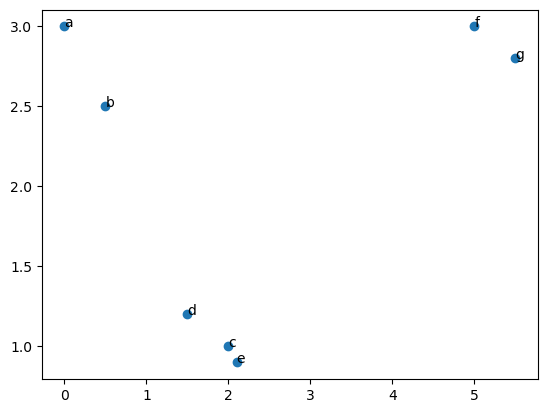

In [21]:
X2 = np.array([[0,3],[0.5,2.5],[2,1],[1.5,1.2],[2.1,0.9],[5,3],[5.5,2.8]])
y2 = ['a','b','c','d','e','f','g']
plt.scatter(X2[:,0],X2[:,1])
for i in range(7):
    plt.annotate(y2[i], (X2[i,0], X2[i,1]))
plt.show();

We perform hierarchical clustering using the `linkage` function. The result can be displayed as a visualization called a *dendrogram*. Note the function comes from another package called `scipy`.

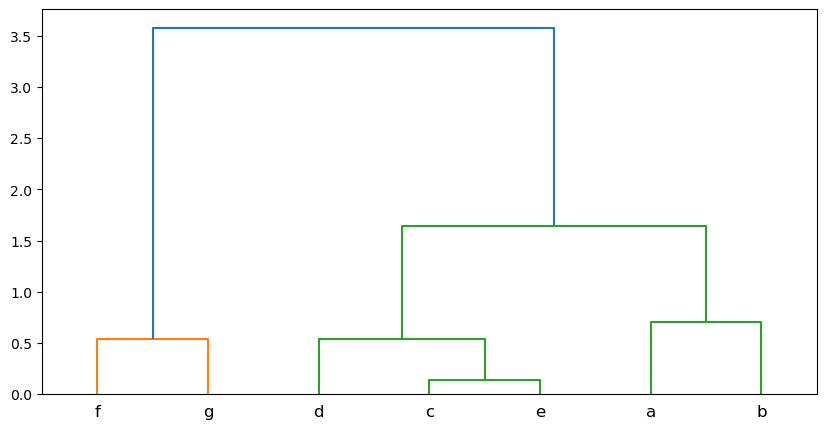

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage  

plt.figure(figsize=(10,5))
linked = linkage(X2)
dendrogram(linked, labels=y2)
plt.show()

Intuitively, this should look like a reasonable visual description of the multiscale clustering of the data.

#### Mathematical Formulation

This version of a dendrogram is described by the following rule. Points $x$ and $y$ in our dataset are joined in the dendrogram below height $\epsilon$ if and only if there is a chain of data points $x = x^1,x^2,\ldots,x^\ell = y$ such that each consective pair of links $x^i$ and $x^{i+1}$ is within distance $\epsilon$. 

**Important Observation:** One great thing about this hierarchical clustering algorithm is that it is very flexible; in fact, the algorithm outlined above makes sense in general metric spaces. If we want to get really fancy: the map taking a dataset to its dendrogram is a functor from the category of finite metric spaces to the category of finite ultrametric spaces which is stable with respect to Gromov-Hausdorff distance. We will explore these ideas in next week's lecture.

## More Examples

Let's try it on our 'concentric circles' data. Recall, the data looks like this:

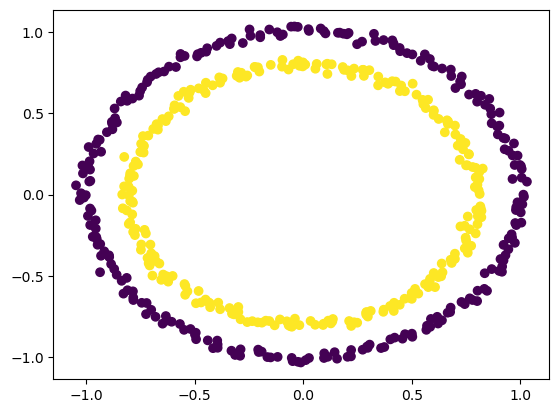

In [23]:
plt.scatter(X1[:,0],X1[:,1],c=y1)
plt.show()

The dendrogram for the dataset looks like this:

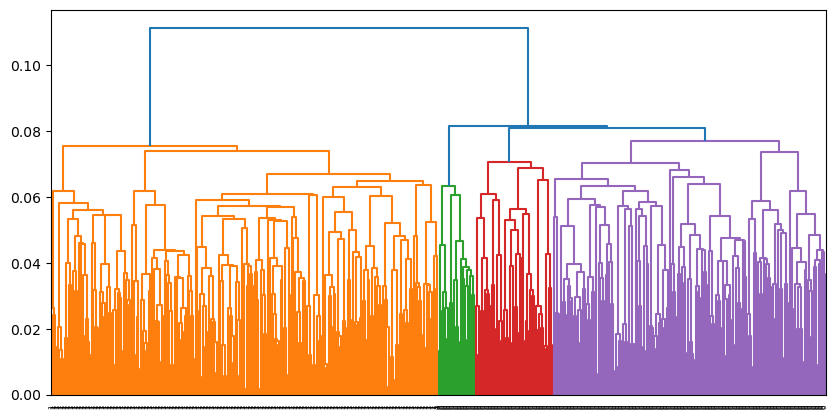

In [24]:
plt.figure(figsize=(10,5))
linked = linkage(X1)
dendrogram(linked, labels=y1)
plt.show()

Looks like two clusters (at the 'dominant resolution')! But are they really corresponding to the two circles? We can apply `AgglomerativeClustering` from `scikit-learn` to extract the points in the two big clusters. This clustering algorithm requires a choice of number of clusters `n_clusters`, then it slices the dendrogram into the `n_clusters` most prominent clusters. The benefit here is that the choice of `n_clusters` is much more clear than in the $k$-Means algorithm. 

In [25]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2, linkage = 'single')
ac.fit(X1)
ac.labels_

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,

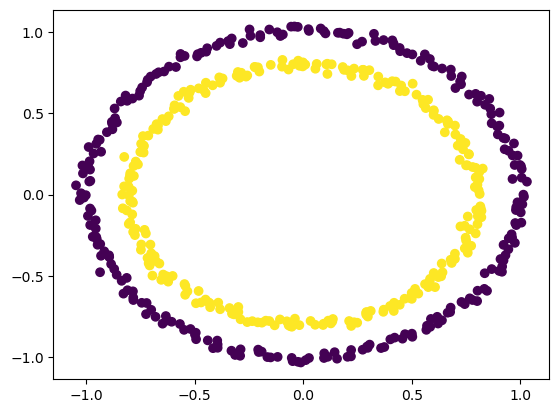

In [26]:
plt.scatter(X1[:,0],X1[:,1],c=ac.labels_);

It worked! Interestingly, if we increase the number of clusters the algorithm picks out the 'connected pieces' of the circles.

This is starting to hint at the reason this sort of clustering might be interesting from the perspective of Topological Data Analysis.

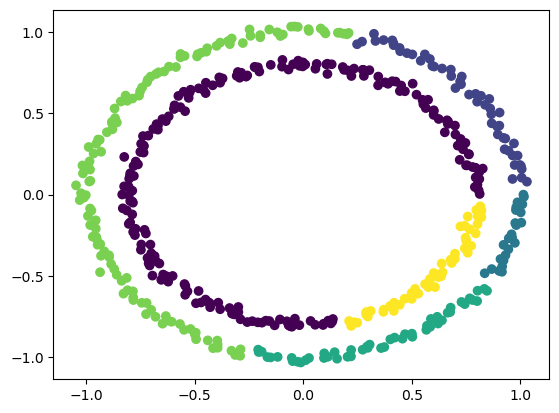

In [31]:
ac = AgglomerativeClustering(n_clusters=6, linkage = 'single')
ac.fit(X1)
plt.scatter(X1[:,0],X1[:,1],c=ac.labels_);

**Remark:** There are lots of options for hierarchical clustering. In particular, dendrograms can be created via different algorithms; see https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html. Similar options are available for Agglomerative clustering https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html. Performance of each method will depend on the data.

We will mostly focus on the method above, which is called *Single Linkage Hierarchical Clustering*. Other methods are popular, though. Here's an example.

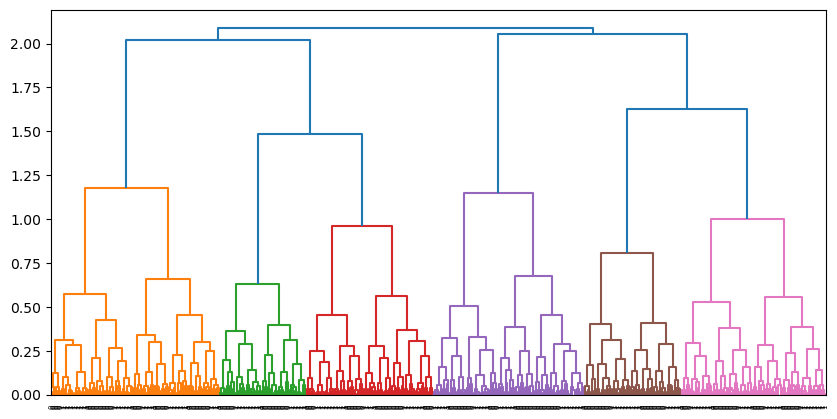

In [32]:
plt.figure(figsize=(10,5))
linked = linkage(X1, 'complete')
dendrogram(linked, labels=y1)
plt.show()

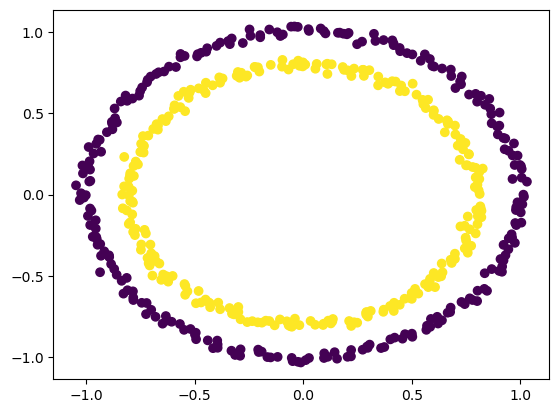

In [37]:
ac = AgglomerativeClustering(n_clusters=2, linkage = 'single')
ac.fit(X1)
plt.scatter(X1[:,0],X1[:,1],c=ac.labels_);

**Remark:** The default linkage type for `AgglomerativeClustering` is `ward`, which gives a bad result here. Playing with the options for any particular application is important!

## Extra Time (Or work on this later if you're interested): $K$-Means Algorithm

As promised above, we can implement an approximation of the $K$-Means Algorithm 'from scratch'. Here's a naive attempt at doing so.

The basic idea is to find a local minimizer of $f(\mathcal{S})$ via gradient descent. Instead of directly optimizing over partitions (which don't live in a continuous space, making it hard to do calculus...), we optimize over *cluster centers*. Given a collection of $K$ cluster centers, we infer the parition by assigning a point $x$ to the partition set of its nearest cluster center.

As we develop our algorithm, we'll see a few nifty tricks that can be done using the `numpy` package, which is ubiquitous in Python programming.

#### Step 1: Initialize with Random Cluster Centers

The usual approach to gradient descent optimization is to start with a random point. A useful function for this task is `np.random.choice`.

In [ ]:
# Example
np.random.choice(10,3)

In [ ]:
def cluster_centers(X,K):
    return X[np.random.choice(len(X),size=K)]
    # Pull out entries of X given by the random choice of K indices

# Testing
print(cluster_centers(X,2))
print(cluster_centers(X,2))
print(cluster_centers(X,3))

#### Step 2:  Determine Clusters

For each point in $X$, we figure out which cluster center is nearest to it. 

We will employ a useful trick called *numpy broadcasting*. If we apply arithmetic operations to `numpy` arrays of incompatible sizes, numpy broadcasting will make sense of this by 'broadcasting' the smaller array over the larger one. This only works under certain conditions on the sizes, so we have to put some thought into setting it up.

In [ ]:
# Define arrays to test on
A = np.array([[1,2]])
B = np.array([[0,0],[1,1],[2,2]])

It doesn't make sense mathematical to add these different-sized if we think of them as matrices. On the other hand, `numpy` interprets addition as: 'add the row of `A` to *each* row of `B`.

In [ ]:
# It doesn't make sense to add these arrays mathematically
A + B

We can get even trickier by employing the `np.newaxis` function which takes a 1D array to a 2D array, a 2D array to a 3D array, etc. The way that the function affects the array depends on which 'slot' we use it in.

In [ ]:
# Define a new test array
C = np.array([[1,2],[3,4]])
Cnew = C[:,np.newaxis,:]
print(Cnew.shape)
Cnew

The following gives an error. To see the general rules for broadcasting, check here: https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html

In [ ]:
B+C

On the other hand, our reshaped array `Cnew` follows the rules to be broadcast with `B`.

In [ ]:
print((B+Cnew).shape)
B+Cnew

Now let's define our function. The input is the dataset `X` and a collection of cluster centers `centers` (e.g., the output of `cluster_centers(X,K)`). The output is an array indicating the index of the cluster center to which each element $\vec{x}_j$ of $X$ belongs.

In [ ]:
def closest(X, centers):
    distances = np.linalg.norm(X - centers[:, np.newaxis,:], axis=2)
    return np.argmin(distances, axis=0)

In [ ]:
# Testing
centers = cluster_centers(X,2)
closest(X,centers)

#### Step 3: Update Centers

Now we define an 'update' function. The input is our dataset `X` and a set of cluster centers `centers`. The output is a new collection of cluster centers, obtained by
- partitioning the data according to the input cluster centers,
- computing the mean within each cluster.

In [ ]:
def new_centers(X, centers):
    c = closest(X, centers)
    K = len(np.unique(c)) # Determine K by finding the number of labels in c
    return np.array([X[c==k].mean(axis=0) for k in range(K)])

In [ ]:
# Test
new_centers(X,centers)

#### Step 4: Iterate the procedure

We can now write our algorithm. We simply iterate the procedure above until the cluster center updates stop moving.

In [ ]:
def kMeans(X, K, max_iter = 10000):
    # Initializations
    centers = X[np.random.choice(len(X),size=K)]
    iteration = 0
    Delta = 1
    # While loop with a hard limit on number of iterations
    while Delta > .001 and iteration < max_iter:
        moved = new_centers(X,centers)
        Delta = np.linalg.norm( moved - centers )
        iteration = iteration+1
        centers = moved
    print('Iterations to converge: ', iteration)
    labels = closest(X,centers)
    # Output is a tuple
    return centers, labels

Let's test it on our data!

In [ ]:
centers, labels = kMeans(X,2)

In [ ]:
fig = plt.figure(figsize=(10,5))

p1 = fig.add_subplot(1,2,1)
p1.scatter(X[:,0],X[:,1],c=y)
plt.title('Ground Truth')

p2 = fig.add_subplot(1,2,2)
p2.scatter(X[:,0],X[:,1],c=1-labels) # Use 1-labels so the colors match up
p2.scatter(centers[:,0],centers[:,1], marker = '^', c = 'r')
plt.title('KMeans Algorithm')

plt.show()

Looks great! 

Feel free to play around with this algorithm and compare it to the outputs of `sklearn`. For simple datasets it should give the same performance, but it might break when things get complicated (because the implementation above is very simple and the `sklearn` is undoubtedly more sophisticated!).